In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [12]:
files = list(filter(lambda v:".csv" in v,os.listdir()))

In [23]:
data = np.loadtxt(files[0],delimiter=',')

In [24]:
def plotTraj(data):
    plt.figure(figsize=(5,5))
    plt.axes().set_aspect('equal', 'datalim')
    plt.plot(data[:,3]-data[0,3],data[:,4]-data[0,4])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True,which='major')
    plt.tight_layout()

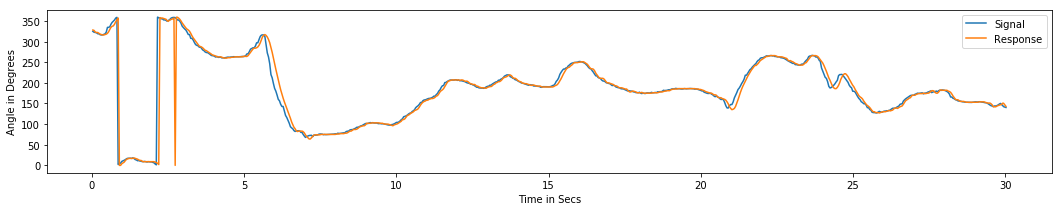

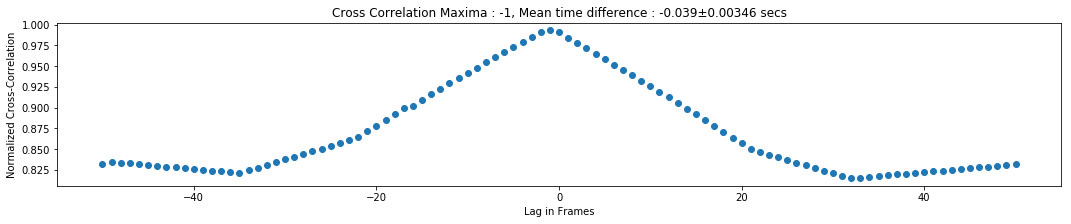

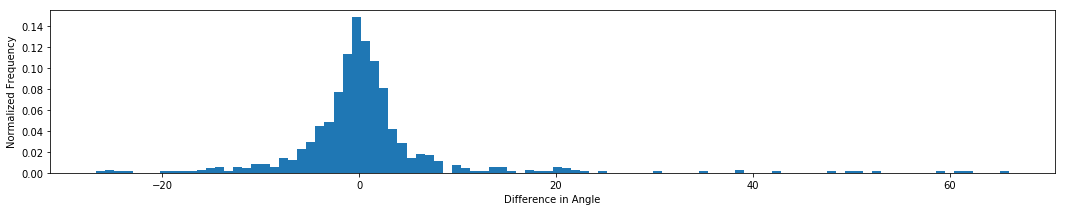

In [79]:
plt.figure(figsize=(18,3))
time = data[:,0]
heading = (360-data[:,1]-32)%360
position = data[:,2]%360
plt.plot(time,heading,label="Signal")
plt.plot(time,position,label="Response")
plt.xlabel("Time in Secs")
plt.ylabel("Angle in Degrees")
plt.legend()
plt.show()
plt.figure(figsize=(18,3))
lags,vals,_,_ = plt.xcorr(heading,position,maxlags=50,usevlines=False)
xcorr_max = lags[np.argmax(vals)]
plt.title("Cross Correlation Maxima : {}, Mean time difference : {:0.03}±{:0.03} secs".format(xcorr_max,np.diff(time).mean()*xcorr_max,np.diff(time).std()*abs(xcorr_max)))
plt.xlabel("Lag in Frames")
plt.ylabel("Normalized Cross-Correlation")
plt.show()
plt.figure(figsize=(18,3))
angle_diff = ( position - heading + 360+180 ) % 360 - 180
# angle_diff = 180 - abs(abs(heading - eq_position) - 180)
plt.hist(angle_diff,bins=100,density=True)
plt.xlabel("Difference in Angle")
plt.ylabel("Normalized Frequency")
plt.show()
plt.show()